# Assignment 2: Statistic
## Tugas
- Mean
- Median
- Modus
- Range
- Variance
- Standard Deviation
- Probability Distribution
- Confidence Interval
- Hypothesis Testing
- Preprocessing

**Tentang Dataset**

**Konteks**

Kumpulan data ini adalah catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di pasar properti Kota New York selama periode 12 bulan.

**Isi**

Dataset ini berisi tentang lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi di bidang yang lebih rumit:

- BOROUGH: Kode digit untuk wilayah tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- BLOCK; LOT: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut a BBL.
- BUILDING CLASS AT PRESENTdan BUILDING CLASS AT TIME OF SALE: Jenis bangunan pada berbagai titik waktu.

Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diingat:

- Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling umum. Penjualan ini sebenarnya adalah transfer akta antar pihak: misalnya, orang tua mengalihkan kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun.
- Dataset ini menggunakan definisi keuangan dari sebuah bangunan/unit bangunan, untuk tujuan perpajakan. Dalam hal satu entitas memiliki bangunan yang bersangkutan, penjualan mencakup nilai seluruh bangunan. Dalam hal sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

# Preparing Data

In [1]:
import numpy as np
import pandas as pd

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# labelEncoder
from sklearn.preprocessing import LabelEncoder

# hypothesis
import scipy.stats.distributions as dist

In [2]:
missing_values = [' ', ' -  ']

df = pd.read_csv("/content/drive/MyDrive/tugas_studi/nyc-rolling-sales.csv", na_values=missing_values)

In [3]:
df.shape

(84548, 22)

In [4]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

Dari informasi diatas dapat diketahui bahwa terdapat beberapa kolom yang memiliki nilai null di dalamnya, karena itu selanjutnya mari lakukan **cleaning data**.

# Cleaning Data

Kolom **Unnamed:0** tidak merepresentasikan informasi yang penting dan dibutuhkan untuk pemrosesan data kita. Sedangkan, **EASE-MENT** tidak memiliki data sama sekali di dalamnya alias 0.

Mari kita **drop** saja.

In [6]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)

**Cek apakah ada nilai null atau tidak.**

In [7]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Terdapat begitu banyak nilai null pada beberapa kolom, mari lakukan **fillna** saja.

In [8]:
df.fillna(method='ffill', inplace=True);
df.isnull().sum()

BOROUGH                            0
NEIGHBORHOOD                       0
BUILDING CLASS CATEGORY            0
TAX CLASS AT PRESENT               0
BLOCK                              0
LOT                                0
BUILDING CLASS AT PRESENT          0
ADDRESS                            0
APARTMENT NUMBER                  73
ZIP CODE                           0
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

In [9]:
df.fillna(method='bfill', inplace=True);
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Nilai null berhasil teratasi!

**Cek apakah ada nilai duplikat atau tidak.**

In [10]:
df.duplicated().sum()

924

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Nilai duplikat berhasil teratasi!

**Rename Kolom**

Nama dari tiap kolom memiliki spasi yang memisahkan kata per kata dan ditulis dengan huruf kapital, ini akan merepotkan bahkan menyulitkan pemrosesan data pada beberapa kondisi di masa yang akan datang.

In [12]:
df.rename(columns={'BOROUGH': 'borough',
                   'NEIGHBORHOOD':'neighborhood',
                   'BUILDING CLASS CATEGORY': 'building_class_category',
                   'TAX CLASS AT PRESENT': 'tax_class_at_present',
                   'BLOCK': 'block', 
                   'LOT': 'lot',
                   'BUILDING CLASS AT PRESENT': 'building_class_at_present',
                   'ADDRESS': 'address',
                   'APARTMENT NUMBER': 'apartment_number',
                   'ZIP CODE': 'zip_code',
                   'RESIDENTIAL UNITS': 'residential_units',
                   'COMMERCIAL UNITS': 'komersial_units',
                   'TOTAL UNITS': 'total_units',
                   'LAND SQUARE FEET': 'land_square_feet',
                   'GROSS SQUARE FEET': 'gross_square_feet',
                   'YEAR BUILT': 'year_built',
                   'TAX CLASS AT TIME OF SALE': 'tax_class_at_time_of_sale',
                   'BUILDING CLASS AT TIME OF SALE': 'building_class_at_time_of_sale',
                   'SALE PRICE': 'sale_price',
                   'SALE DATE': 'sale_date'}, inplace=True)

**Rubah tipe data**

Kolom 'sale_price' akan lebih baik bila bertipe data integer atau bilangan bulat, karena pada kenyataannya harga memang harus selalu bilangan bulat.

In [13]:
df['sale_price'] = df['sale_price'].astype(int)

**Cek statistik deskriptif dataframe.**

In [14]:
df.describe()

,borough,block,lot,zip_code,residential_units,komersial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price
count,83624.000000,83624.000000,83624.000000,83624.000000,83624.000000,83624.000000,83624.000000,8.362400e+04,8.362400e+04,83624.000000,83624.000000,8.362400e+04
mean,2.999019,4241.604372,376.313319,10733.494667,1.994140,0.180642,2.204654,1.833142e+04,4.320566e+04,1789.823328,1.653987,1.663008e+06
std,1.288139,3566.330226,658.057001,1289.078797,16.575782,8.539713,18.767204,1.936508e+05,2.071511e+05,536.570742,0.814315,1.592342e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.950000e+03,1.330000e+03,1920.000000,1.000000,2.598868e+05
50%,3.000000,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.640000e+03,2.392000e+03,1940.000000,2.000000,5.600000e+05
75%,4.000000,6290.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,5.000000e+03,1.001350e+04,1965.000000,2.000000,9.825000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


**Cek statistik inferensial dataframe.**

## Probability Distribution: **borough**

In [31]:
mean = df['borough'].mean()
std = df['borough'].std()
p = 0.5

(array([ 997., 1035.,  975.,  982., 1068.,  993.,  971., 1007.,  967.,
        1005.]),
 array([1.28829489, 1.45935137, 1.63040785, 1.80146433, 1.97252082,
        2.1435773 , 2.31463378, 2.48569027, 2.65674675, 2.82780323,
        2.99885971]),
 <a list of 10 Patch objects>)

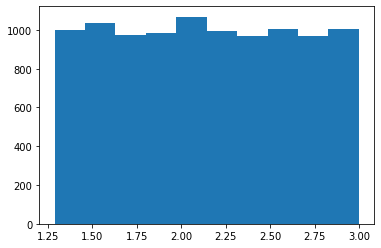

In [32]:
# Uniform Distribution
data_uniform = np.random.uniform(mean, std, size=10000)

plt.hist(data_uniform)

(array([   4.,   74.,  403., 1331., 2662., 2987., 1756.,  610.,  152.,
          21.]),
 array([-2.11117849, -1.11888019, -0.12658189,  0.86571642,  1.85801472,
         2.85031302,  3.84261133,  4.83490963,  5.82720793,  6.81950624,
         7.81180454]),
 <a list of 10 Patch objects>)

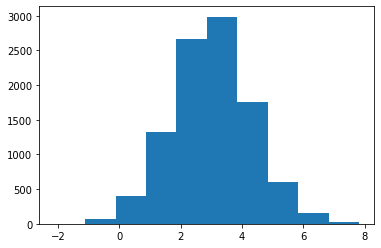

In [33]:
# Normal Distribution
data_normal = np.random.normal(mean, std, size=10000)

plt.hist(data_normal)

(array([1511., 3289., 2518., 1425.,  720.,  328.,  140.,   48.,   16.,
           5.]),
 array([ 0.16077735,  1.75421156,  3.34764577,  4.94107997,  6.53451418,
         8.12794838,  9.72138259, 11.3148168 , 12.908251  , 14.50168521,
        16.09511942]),
 <a list of 10 Patch objects>)

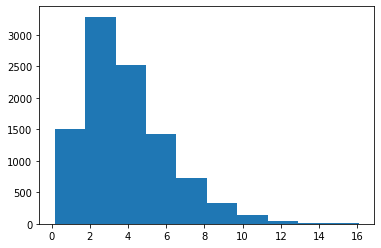

In [34]:
# Gamma Distribution
data_gamma = np.random.gamma(mean, std, size=10000)

plt.hist(data_gamma)

(array([5.897e+03, 2.438e+03, 9.650e+02, 4.160e+02, 1.780e+02, 5.900e+01,
        3.200e+01, 1.100e+01, 3.000e+00, 1.000e+00]),
 array([1.56355861e-04, 2.69823592e+00, 5.39631549e+00, 8.09439506e+00,
        1.07924746e+01, 1.34905542e+01, 1.61886338e+01, 1.88867133e+01,
        2.15847929e+01, 2.42828725e+01, 2.69809520e+01]),
 <a list of 10 Patch objects>)

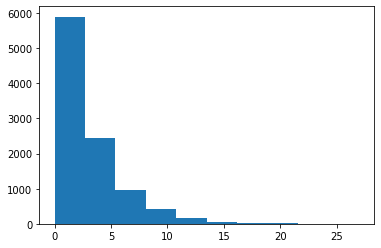

In [35]:
# Exponential Distribution
data_expon = np.random.exponential(mean, size=10000)

plt.hist(data_expon)

(array([1978., 2156., 2265., 1741.,  983.,  525.,  218.,   98.,   27.,
           9.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

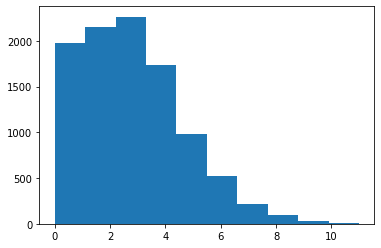

In [36]:
# Poisson Distribution
data_poisson = np.random.poisson(mean, 10000)

plt.hist(data_poisson)

(array([135.,   0.,   0.,   0.,   0., 253.,   0.,   0.,   0., 112.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

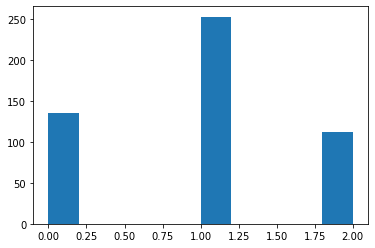

In [37]:
# Binomial Distribution
data_binom = np.random.binomial(mean, p, 500)

plt.hist(data_binom)

## Confidence Interval

**Kami akan membangun CI untuk proporsi populasi bangunan kelas tax (2)  saat penjualan di Queens.** Kita tidak membutuhkan semua kolom dalam dataset. Kita hanya akan menggunakan kolom 'borough' dan kolom 'tax_class_at_time_of_sale'.

In [22]:
dx = df[['borough', 'tax_class_at_time_of_sale']].dropna()
pd.crosstab(dx.borough, dx.tax_class_at_time_of_sale)

tax_class_at_time_of_sale,1,2,3,4
borough,,,,
1,346,16449,1,1254
2,4367,2101,2,524
3,12564,9054,0,2225
4,16332,8395,0,1735
5,7503,423,0,349


Pemilik bangunan dengan kelas Tax (2) pada saat penjualan di Queens berjumlah 8395 orang.

In [23]:
# Hitung proporsi pemilik bangunan dengan kelas Tax (2) pada saat penjualan di Queens.

p_fm = 36442/(8395+36442)
print("p_fm:", p_fm)

p_fm: 0.8127662421660682


In [24]:
''' Hitung jumlah populasi pemilik bangunan 
dengan kelas Tax (2) pada saat penjualan di Queens
'''

n = 8395+36442
print("Jumlah populasi pemilik bangunan dengan kelas Tax (2) pada saat penjualan di Queens:")
print(n, "orang")

Jumlah populasi pemilik bangunan dengan kelas Tax (2) pada saat penjualan di Queens:
44837 orang


In [25]:
# Hitung standard error

se_queens = np.sqrt(p_fm * (1-p_fm) / n)
print("Standard error:", se_queens)

Standard error: 0.0018422842197068766


Sekarang buat CI!

 Z-score adalah 1.96 untuk confidence interval 95%.

In [26]:
z_score = 1.96
lcb = p_fm - z_score * se_queens #lower limit of the CI
ucb = p_fm + z_score * se_queens #upper limit of the CI

print("Confidence interval (CI)")
print("lower limit: ", lcb)
print("upper limit: ", ucb)

Confidence interval (CI)
lower limit:  0.8091553650954427
upper limit:  0.8163771192366936


## Hypothesis Testing

Berapa proporsi populasi dari pemilik bangunan/unit bangunan di suatu kota.

**Step 1: Menentukan hipotesis nol dan hipotesis alternatif.**

Dalam permasalahan ini, null hypothesis adalah proporsi populasi yang memiliki bangunan/unit bangunan di suatu kota kurang dari atau sama dengan 20%.

Dan hipotesis alternatifnya adalah proporsi penduduk suatu kota yang memiliki bangunan/unit bangunan lebih dari 20%.

In [27]:
'''
H0: p0 = 0.20 # null hypothesis
Ha: p > 0.20  # alternative hypothesis
'''

'\nH0: p0 = 0.20 # null hypothesis\nHa: p > 0.20  # alternative hypothesis\n'

Mari kita lihat apakah kita dapat menemukan bukti untuk reject the null hypothesis.

**Step 2**

In [28]:
# Population proportion sample
p_bor1 = len(df[df['borough']==1])/len(df)
p_bor2 = len(df[df['borough']==2])/len(df)
p_bor3 = len(df[df['borough']==3])/len(df)
p_bor4 = len(df[df['borough']==4])/len(df)
p_bor5 = len(df[df['borough']==5])/len(df)

print("Manhattan: ", p_bor1)
print("Bronx: ", p_bor2)
print("Brooklyn: ", p_bor3)
print("Queens: ", p_bor4)
print("Staten Island: ", p_bor5)

Manhattan:  0.2158471252272075
Bronx:  0.08363627666698556
Brooklyn:  0.28512149622118055
Queens:  0.3164402563857266
Staten Island:  0.09895484549889984


Proporsi populasi sampel di Queens yang memiliki bangunan/unit bangunan adalah **0.31 atau 31%**. Persentase ini lebih dari null hypothesis, yaitu 20%.

Tetapi pertanyaannya adalah apakah secara signifikan lebih dari 20%. Jika kita mengambil sample acak yang berbeda, proporsi populasi yang diamati saat ini (31%) bisa berbeda.

Untuk mengetahui apakah proporsi populasi yang diamati secara signifikan lebih dari null hypothesis, lakukan hypothesis test.

**Step 3: Hitung Statistik Uji**

In [29]:
# Calculate the Test Statistic
se = np.sqrt(0.20 * (1-0.20) / len(df))

# Best estimate
be = p_bor4

# hypothesized estimate
he = 0.20
test_stat = (be-he)/se

print("Hasil statistik uji adalah", test_stat)

Hasil statistik uji adalah 84.17994359106184


**Step 4: Hitung nilai p**

In [30]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print("p-value adalah", pvalue)

p-value adalah 0.0


**Step 5: Simpulkan kesimpulan dari nilai p**

Pertimbangkan significance level alpha adalah 5% atau 0.05. Tingkat signifikansi 5% atau kurang berarti ada kemungkinan 95% atau lebih besar bahwa hasilnya tidak acak.

Di sini p-value lebih tinggi dari significance level yang kita tentukan yaitu 0.05, Jadi kita terima the null hypothesis. Artinya, tidak terdapat perbedaan yang signifikan dalam proporsi penduduk yang memiliki bangunan/unit bangunan di suatu kota.